In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitter16m.csv',encoding ='latin1',header=None)

In [3]:
df=df[[5,0]]
df.columns=['twitts','sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [4]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [5]:
sent_map={0:'negative',4:'positive'}

### Word Counts

In [6]:
df['word_counts']=df['twitts'].apply(lambda x:len(str(x).split()))

In [7]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


In [8]:
df['char_counts']=df['twitts'].apply(lambda x:len(x))

In [9]:
df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average Word Length

In [10]:
def get_avg_word_len(x):
            words = x.split()
            word_len = 0
            for word in words:
                word_len = word_len +len(word)
            return word_len/len(words)

In [11]:

df['avg_word_len']=df['twitts'].apply(lambda x: get_avg_word_len(x))

In [12]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


In [13]:
import numpy as np

In [14]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

### Stop Words Count

In [15]:
print(STOP_WORDS)

{'least', 'twelve', 'made', 'you', 'hereafter', 'nowhere', 'regarding', 'name', 'had', 'of', 'be', 'though', 'first', 'no', 'all', 'mine', 'when', 'fifty', 'has', 'an', 'five', 'third', 'hereby', 'many', 'must', 'ca', 'n’t', 'he', 'put', 'unless', 'besides', 'also', 'keep', 'always', 'anyway', 'if', 'myself', 'somehow', 'where', 'towards', 'while', 'will', 'thereafter', 'used', 'everywhere', 'thru', 'beforehand', 'too', 'between', 'nevertheless', "'re", 'it', 'and', 'in', 'after', 'namely', 'to', 'either', 'however', 'otherwise', 'show', 'they', 'would', 'thence', 'empty', 'very', 'might', 'him', 'get', 'once', 'much', 'anywhere', 'whoever', 'there', 'without', 'each', 'can', 'whereafter', 'back', 'yourself', 'doing', 'forty', 'several', 'well', 'their', '’d', 'whether', 'serious', 'thereby', 'your', 'noone', 'last', 'except', 'give', 'every', 'six', 'rather', 'various', 'because', 'whence', 'together', 'are', 'eleven', 'so', 'becomes', 'that', 'us', 'above', '‘d', 'her', 'may', 'hundr

In [16]:
df['stop_words_len']=df['twitts'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))

In [17]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### Count #HAshTags and @Mentions

In [18]:
df['mentions_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [19]:
df['hashtags_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))

In [20]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0


### if Numeric Digits are present

In [21]:
df['numerics_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))

In [22]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0


### UPPER case word Count

In [23]:
df['upper_counts']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.isupper and len(x)>3]))

In [24]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0,0,19
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0,0,18
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0,21


In [25]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

## Preprocessing and Cleaning

### Lower case conversion

In [26]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

### Contraction to `Expansion`

In [27]:
contractions = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he had",
"he'll" : "he will",
"he's" : "he is",
"I'd" : "I had",
"I'll" : "I will",
"I'm": "I am",
"I've" : "I have",
"isn't" : "is not",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she had",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they had",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we had",
"we're" : "we are",
"we've" : "we have",
"weren't" : "were not",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who's" : "who had",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you had",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have"
}

In [28]:
def cont_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [29]:
x =" i you're in love with each other "

In [30]:
cont_exp(x)

' i you are in love with each other '

In [31]:
%%time
df['twitts']=df['twitts'].apply(lambda x:cont_exp(x))

Wall time: 26.4 s


### Count and Remove Emails

In [32]:
import re 

In [33]:
df['emails'] = df['twitts'].apply(lambda x : re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x))

In [34]:
df['emails_count']= df['emails'].apply(lambda x:len(x))

In [35]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,20,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,3,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,1,0,0,20,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,1,0,0,8,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,1,0,1,21,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,1,0,0,21,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,15,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,1,0,0,14,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,1,0,0,9,[jill@q985fm.com],1


In [36]:
df['twitts']=df['twitts'].apply(lambda x:re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',' ',x))

In [37]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,20,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,3,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,1,0,0,20,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,1,0,0,8,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,1,0,1,21,[press@linkedin.com],1


#### Count URLSs and Remove it.

In [38]:
x='hi,to watch more visit to https://youtube.com/kgptalkie'

In [39]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

[('https', 'youtube.com', '/kgptalkie')]

In [40]:
df['urls_flag']=df['twitts'].apply(lambda x:len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))

In [41]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,1,0,0,19,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,21,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,1,0,0,18,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,10,[],0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0,21,[],0,0


In [42]:
df['twitts']=df['twitts'].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',' ',x))

In [43]:
df.loc[0]['twitts']

'@switchfoot   - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

### Remove RT

In [44]:
df['twitts']=df['twitts'].apply(lambda x:re.sub('RT',"",x))

### Special Character removal or punctuation removal

In [45]:
df['twitts']=df['twitts'].apply(lambda x:re.sub('[^A-Z a-z 0-9]+','',x))

In [46]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww that is a bummer you shoul...,0,19,115,5.052632,4,1,0,0,19,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,21,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,1,0,0,18,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,10,[],0,0
4,nationwideclass no its not behaving at all im ...,0,21,111,4.285714,10,1,0,0,21,[],0,0


### Remove multiple spaces `"hi   hello   "`

In [47]:
x='thanks         for      watching       and      please         like      this        video'

In [48]:
" ".join(x.split())

'thanks for watching and please like this video'

In [49]:
df['twitts']=df['twitts'].apply(lambda x:" ".join(x.split()))

In [50]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww that is a bummer you shoulda g...,0,19,115,5.052632,4,1,0,0,19,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,21,[],0,0


### Remove HTML tags

In [51]:
from bs4 import BeautifulSoup

In [52]:
x = '<html><h2>Thanks for watching<h2></html>'

In [53]:
BeautifulSoup(x,'lxml').get_text()

'Thanks for watching'

In [54]:
df['twitts']=df['twitts'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

### Remove Accented Chars

In [55]:
import unicodedata

In [56]:
x= 'Âccênteèd têxt'

In [57]:
def remove_acented_chars(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [58]:
remove_acented_chars(x)

'Accenteed text'

### Spacy and NLP

#### Remove StopWords

In [59]:
import spacy

In [60]:
x= 'this is stop words removal code'

In [61]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [62]:
df['twitts']=df['twitts'].apply(lambda x:" ".join([t for t in x.split() if t not in STOP_WORDS]))

### Convert into Base or root form of word

In [63]:
nlp = spacy.load('en_core_web_sm')

In [64]:
x = 'kenichan dived times ball managed save 50 rest'

In [65]:
def make_to_base(x):
    x_list =[]
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma =='-PRON-' or lemma =='be':
               lemma =token.text 
        x_list.append(lemma)
    print(" ".join(x_list))

In [66]:
make_to_base(x)

kenichan dive times ball manage save 50 rest


### Common words removal

In [67]:
text = " ".join(df['twitts'])

In [68]:
text = text.split()

In [69]:
freq_comm = pd.Series(text).value_counts()

In [70]:
f20 = freq_comm[:20]

In [71]:
df['twitts']=df['twitts'].apply(lambda x :" ".join([t for t in x.split() if t not in f20]))

### Rare Word removal

In [72]:
rare20 = freq_comm[-20:]

In [73]:
rare20

divorcedyet          1
hmzz                 1
beacose              1
rossdalefans         1
freakboy             1
kev1042              1
lalaberg             1
adventureid          1
renevester           1
campinas             1
tweee                1
followthrough        1
lambos               1
junkyardse           1
topcoat              1
exciiiiteeeeedddd    1
emilyliz             1
maxxgayest           1
tktookool            1
weeklypiano          1
dtype: int64

In [74]:
rare = freq_comm[freq_comm.values == 1]

In [75]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

In [76]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,1,0,0,19,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,21,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,1,0,0,18,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,10,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,1,0,0,21,[],0,0


### Word Cloud Visualization

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
x=" ".join(text[:20000])

In [79]:
len(text)

10973289

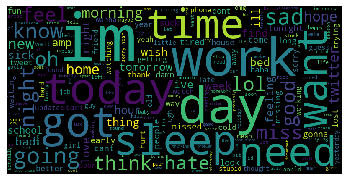

In [80]:
wc = WordCloud(width = 800,height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling Correction

In [81]:
from textblob import TextBlob

In [82]:
x = 'tanks for watching this vidio carri'

In [83]:
x = TextBlob(x).correct()

In [84]:
x

TextBlob("tanks for watching this video carry")

### Tokenization

In [85]:
x ='thanks4watching this video. please like it'

In [86]:
TextBlob(x).words

WordList(['thanks4watching', 'this', 'video', 'please', 'like', 'it'])

In [87]:
doc = nlp(x)
for token in doc:
    print(token.text)

thanks4watching
this
video
.
please
like
it


### Lemmatization

In [88]:
from textblob import Word

In [89]:
x ='runs run running ran'

In [90]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [91]:
doc =nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


### Detect Entities using NER of Spacy 

In [92]:
x= "Breaking News: Donlad Trump,the president of USA is looking to sign a deal to mine the moon"

In [93]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - '+str(spacy.explain(ent.label_)))

Donlad Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [94]:
from spacy import displacy

In [95]:
displacy.render(doc,style='ent')

### Detecting Nouns

In [96]:
x

'Breaking News: Donlad Trump,the president of USA is looking to sign a deal to mine the moon'

In [97]:
for noun in doc.noun_chunks:
    print(noun)

Breaking
News
Donlad Trump
the president
USA
a deal
the moon


### Translation and language Detection

In [98]:
tb =TextBlob(x)

In [99]:
tb.detect_language()

'en'

In [100]:
tb.translate(to='bn')

TextBlob("ব্রেকিং নিউজ: আমেরিকার রাষ্ট্রপতি ডনলাদ ট্রাম্প চাঁদ খনির জন্য একটি চুক্তিতে সই করতে চাইছেন")

### Use inbuilt sentiment classifier

In [101]:
from textblob.sentiments import NaiveBayesAnalyzer

In [102]:
x = 'we all stands together to fight with corona virus.we will win together'

In [103]:
tb = TextBlob(x,analyzer=NaiveBayesAnalyzer())

In [104]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.902091274873533, p_neg=0.0979087251264664)

### Advanced Text Processing

#### N-Grams

In [105]:
x = 'Thanks for watching this is'

In [106]:
tb = TextBlob(x)

In [107]:
tb.ngrams(4)

[WordList(['Thanks', 'for', 'watching', 'this']),
 WordList(['for', 'watching', 'this', 'is'])]

### Bag of Words `BoW`

In [108]:
x= ['this is first sentence this is ','this is second','this is last']

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [111]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [112]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [113]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [114]:
bow = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [115]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### Term Frequency

###### Term frequency is simply the ratio of count of a word present in a sentence,to the length of the sentence.

In [116]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [117]:
bow.shape

(3, 6)

In [118]:
tf = bow.copy()

In [119]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index: 
        tf.loc[index,col] = tf.loc[index,col]/sum(row[1].values)

In [120]:
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


### Inverse Document Frequency

#### idf = log((1+N)/(n+1))+1 used in sklearn when smooth_idf=True
#### where,N is the total number of rows and n is the number of rows in which the word was present. 

In [121]:
import numpy as np

In [122]:
x_df = pd.DataFrame(x,columns=['words'])

In [123]:
x_df

,words
0,this is first sentence this is
1,this is second
2,this is last


In [124]:
N = bow.shape[0]

In [125]:
N

3

In [126]:
bb = bow.astype('bool')

In [127]:
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [128]:
bb['is'].sum()

3

In [129]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [130]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [131]:
nz

[1, 3, 1, 1, 1, 3]

In [132]:
idf = []
for index,col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index] +1)) +1)

In [133]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [134]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### TFIDF

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [137]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [138]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

### Word Embeddings

#### Spacy `Word2Vec`

In [139]:
nlp = spacy.load('en_core_web_lg')

In [140]:
doc = nlp('thank you! dog cat lion dfasaa')

In [141]:
for token in doc:
    print(token.text,token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa False


In [143]:
token.vector.shape

(300,)

In [159]:
nlp('cat').vector.shape

(300,)

In [145]:
for token1 in doc:
    for token2 in doc:
        print(token1.text,token2.text,token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank dog 0.2504265
thank cat 0.20648485
thank lion 0.13629764
thank dfasaa 0.0

you thank 0.5647585
you you 1.0
you ! 0.4390223
you dog 0.36494097
you cat 0.3080798
you lion 0.20392051
you dfasaa 0.0

! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852203
! cat 0.29702348
! lion 0.19601382
! dfasaa 0.0

dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog dfasaa 0.0

cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat dog 0.80168545
cat cat 1.0
cat lion 0.52654374
cat dfasaa 0.0

lion thank 0.13629764
lion you 0.20392051
lion ! 0.19601382
lion dog 0.47424486
lion cat 0.52654374
lion lion 1.0
lion dfasaa 0.0

dfasaa thank 0.0
dfasaa you 0.0
dfasaa ! 0.0
dfasaa dog 0.0
dfasaa cat 0.0
dfasaa lion 0.0
dfasaa dfasaa 1.0



C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  This is separate from the ipykernel package so we can avoid doing imports until


### Machine Learning Models for Text Classification

In [146]:
df.shape

(1600000, 13)

In [147]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [148]:
dfr = df0.append(df4)

In [149]:
dfr.shape

(4000, 13)

In [150]:
dfr

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails,emails_count,urls_flag
725398,woahamber wow thats harsh,0,4,28,5.750000,0,1,0,0,4,[],0,0
87569,1 broken radiator plans baby ava foiled garden,0,18,88,3.888889,8,0,0,1,18,[],0,0
198552,way church look bed need gel,0,19,77,3.052632,6,0,0,0,19,[],0,0
708997,merelymeg gone week busy found great buy flea ...,0,27,138,4.111111,11,1,0,0,27,[],0,0
17916,shessokillher aww luck tomorrow hope feel bett...,0,23,133,4.782609,5,1,0,0,23,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489920,damn shorts abs developing fat intend rid soon,4,22,111,4.000000,12,0,0,0,22,[],0,0
957049,vote blogs poll bit girlie question relevant s...,4,19,131,5.894737,7,0,0,0,19,[],0,1
1038882,euniqueflair touching keyboardkeypad touching ...,4,13,98,6.538462,6,1,0,0,13,[],0,0
1350186,2 exmas cant wait x,4,11,45,3.090909,6,0,0,1,11,[],0,0


In [153]:
dfr_feat = dfr.drop(labels=['twitts','sentiment','emails'],axis=1)

In [154]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,mentions_count,hashtags_count,numerics_count,upper_counts,emails_count,urls_flag
725398,4,28,5.750000,0,1,0,0,4,0,0
87569,18,88,3.888889,8,0,0,1,18,0,0
198552,19,77,3.052632,6,0,0,0,19,0,0
708997,27,138,4.111111,11,1,0,0,27,0,0
17916,23,133,4.782609,5,1,0,0,23,0,0
...,...,...,...,...,...,...,...,...,...,...
1489920,22,111,4.000000,12,0,0,0,22,0,0
957049,19,131,5.894737,7,0,0,0,19,0,1
1038882,13,98,6.538462,6,1,0,0,13,0,0
1350186,11,45,3.090909,6,0,0,1,11,0,0


In [156]:
y = dfr['sentiment']

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

In [160]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [161]:
text_counts.toarray().shape

(4000, 9890)

In [172]:
dfr_bow = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [173]:
dfr_bow

,000,0010utc,07,09,0kenjoy,0oh,10,100,10000th,1000am300pmpeople,...,znatrainer,zofiac,zoitspider,zombie,zone,zuckerbaby,zune,zyder,zzzz,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML Algoritms

In [164]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [168]:
sgd = SGDClassifier(n_jobs=-1,random_state=42,max_iter=200)
lgr= LogisticRegression(random_state=42,max_iter=200)
lgrcv = LogisticRegressionCV(cv=2,random_state=42,max_iter=1000)
svm = LinearSVC(random_state=42,max_iter=200)
rfc = RandomForestClassifier(random_state=42,n_estimators=200)

In [169]:
clf = {'SGD':sgd,'LGR':lgr,'LGR-CV':lgrcv,'SVM':svm,'RFC':rfc}

In [170]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [178]:
def classify(X,y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
    
    for key in clf.keys():
        clf[key].fit(X_train,y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test,y_pred)
        print(key,"---->",ac)

### BOW

In [180]:
%%time
classify(dfr_bow,y)

SGD ----> 0.63625
LGR ----> 0.66
LGR-CV ----> 0.655
SVM ----> 0.6475
RFC ----> 0.655
Wall time: 2min 50s


#### Manual Feature

In [181]:
%%time
classify(dfr_feat,y)

SGD ----> 0.59375
LGR ----> 0.59
LGR-CV ----> 0.585
SVM ----> 0.585
RFC ----> 0.545
Wall time: 2.11 s


#### Manual + Bow

In [184]:
dfr_feat = dfr.drop(labels=['twitts','sentiment','emails'],axis=1).reset_index(drop=True) 

In [187]:
X = dfr_feat.join(dfr_bow)

In [188]:
%%time
classify(X,y)

SGD ----> 0.65
LGR ----> 0.685
LGR-CV ----> 0.68625
SVM ----> 0.6525
RFC ----> 0.68
Wall time: 2min 27s


### TFIDF

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [190]:
dfr.shape

(4000, 13)

In [191]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['twitts'])

In [196]:
%%time
classify(pd.DataFrame(X.toarray()),y)

SGD ----> 0.6275
LGR ----> 0.66625
LGR-CV ----> 0.68375
SVM ----> 0.62875
RFC ----> 0.6425
Wall time: 3min 44s


### Word2Vec

In [204]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1,-1)

In [211]:
%%time
dfr['vec'] = dfr['twitts'].apply(lambda x:get_vec(x))

Wall time: 47.3 s


In [212]:
X = np.concatenate(dfr['vec'].to_numpy(), axis=0)

In [214]:
X.shape

(4000, 300)

In [215]:
classify(pd.DataFrame(X),y)

SGD ----> 0.64


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LGR ----> 0.6925
LGR-CV ----> 0.695


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM ----> 0.6725
RFC ----> 0.65625


In [224]:
def pred_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "---->",y_pred)

In [225]:
pred_w2v('congratulation, youy are lookking good')

SGD ----> [0]
LGR ----> [4]
LGR-CV ----> [4]
SVM ----> [4]
RFC ----> [4]
